# Debt Data Analysis

# Introduction
---
This analysis is based on a loan datasheet of a lending club. Where we want to find what type of customer base, what is the customer behavior, which type of loan club gets most of there profit and some other factor to the for a loan.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#define the base color
base_color = sns.color_palette()[0]

In [3]:
#load data set
data = pd.read_csv("clean_file.csv")

Club divided the customer in a few ProsperRatings. This rating shows the customer category based on the customer’s credit rating and other activities. Which decides whether to lend to the customer on not and if yes then on how much APR. The club has mostly targeted the customer who is in a debt loop and has the medium Prosper Scor and the customer wants the loans for Debt Consolidation and employment but the customer should not have more than 20 Inquiries or Credit lines. Also, customers should not have much debt to income ratio the upper limit for debt to income ratio is 10. Club majority lend to the peoples outside the group for 36 terms plan with an average APR of 0.10- 0.20.

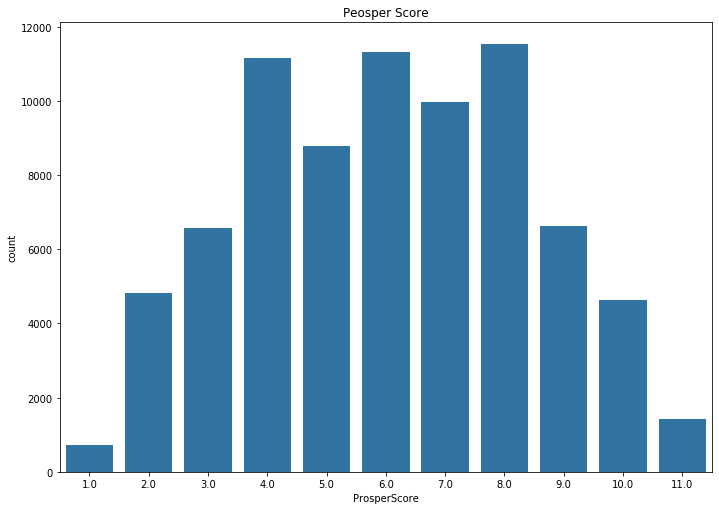

In [36]:
#ProsperScore plot
plt.figure(figsize=[ 11.69, 8.27])
sns.countplot(data=data, x='ProsperScore', color=base_color);
plt.title("Peosper Score");

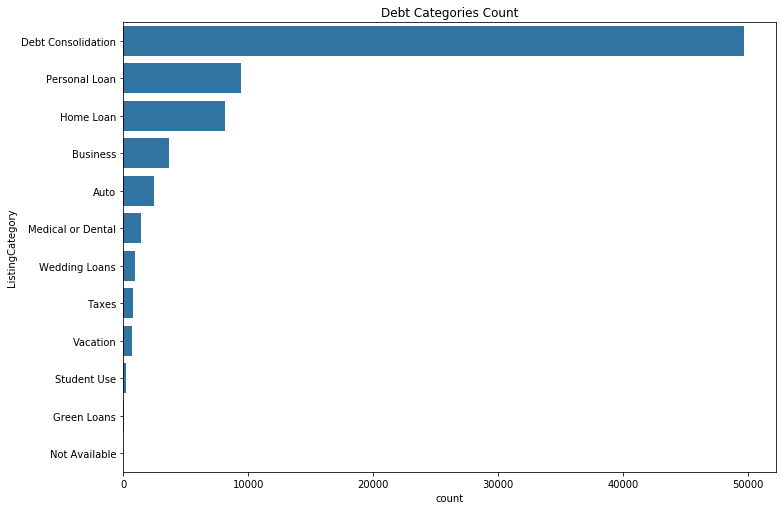

In [41]:
#Debt Type count
plt.figure(figsize=[ 11.69, 8.27])
ListingCategory_order = data.ListingCategory.value_counts().index
sns.countplot(data=data, y='ListingCategory', color=base_color, order=ListingCategory_order);
plt.title("Debt Categories Count");

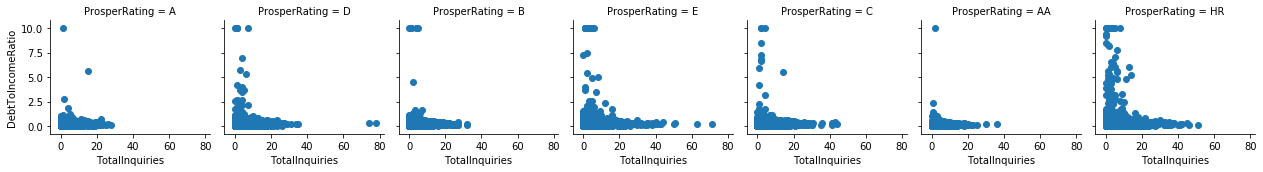

In [8]:
#Debt To Income ratio among Inquiries based on Prosper Ration
g = sns.FacetGrid(data = data, col='ProsperRating', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'TotalInquiries', 'DebtToIncomeRatio');

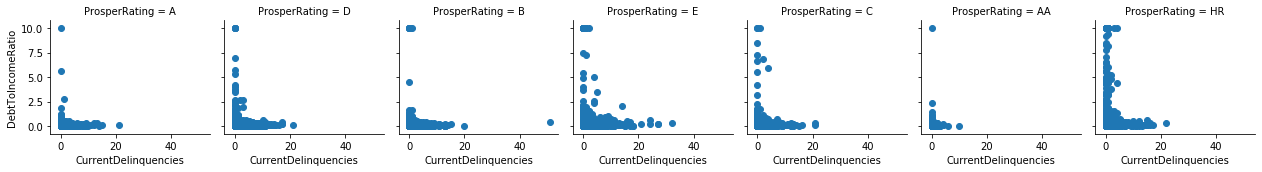

In [9]:
#Debt To Income Ratio scatter among Delinquencies based on Prosper Rating
g = sns.FacetGrid(data = data, col='ProsperRating', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'CurrentDelinquencies', 'DebtToIncomeRatio');

Most of the peoples which are in a debt loop have a high debt to income ratio and have fewer Delinquencies history. They tend to pay off their loan before the time period. They also have high Trading and Inquiry history. Which shows that they take the debt on a regular basis. These types of the customer will take the debt with any percentage of principle funding or Borrowing APR.

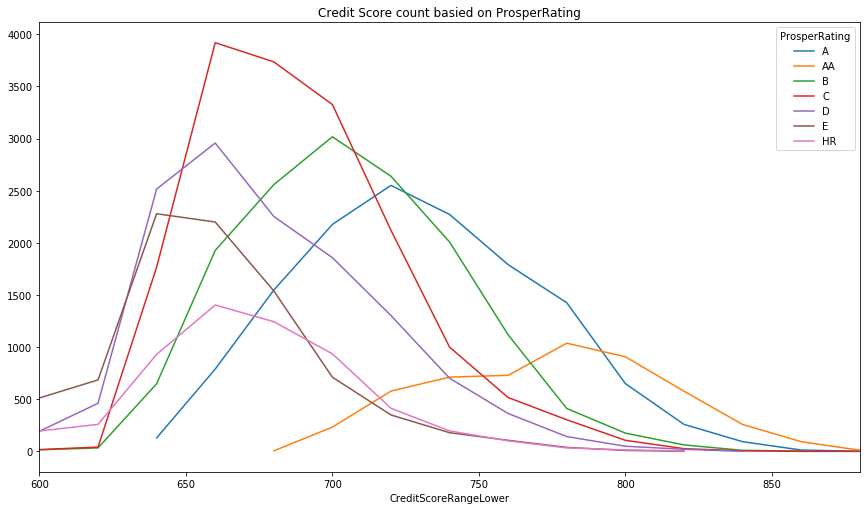

In [40]:
#Prosper Ration count as per credit score
data.groupby(["ProsperRating"]).CreditScoreRangeLower.value_counts().unstack("ProsperRating").plot.line(figsize=[14.70, 8.27]);
plt.title("Credit Score count basied on ProsperRating");

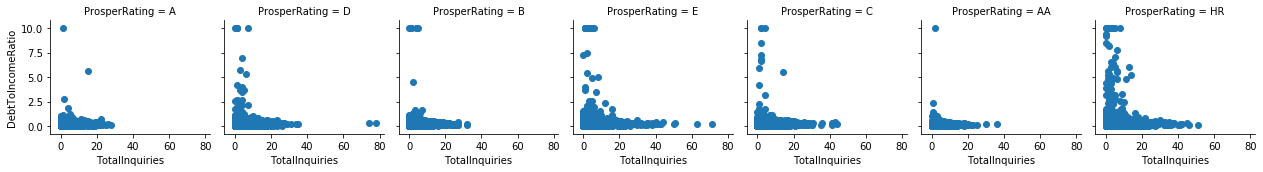

In [11]:
#Debt to Income Ratio scatter among Inquiries based on ProsperRating
g = sns.FacetGrid(data = data, col='ProsperRating', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'TotalInquiries', 'DebtToIncomeRatio');

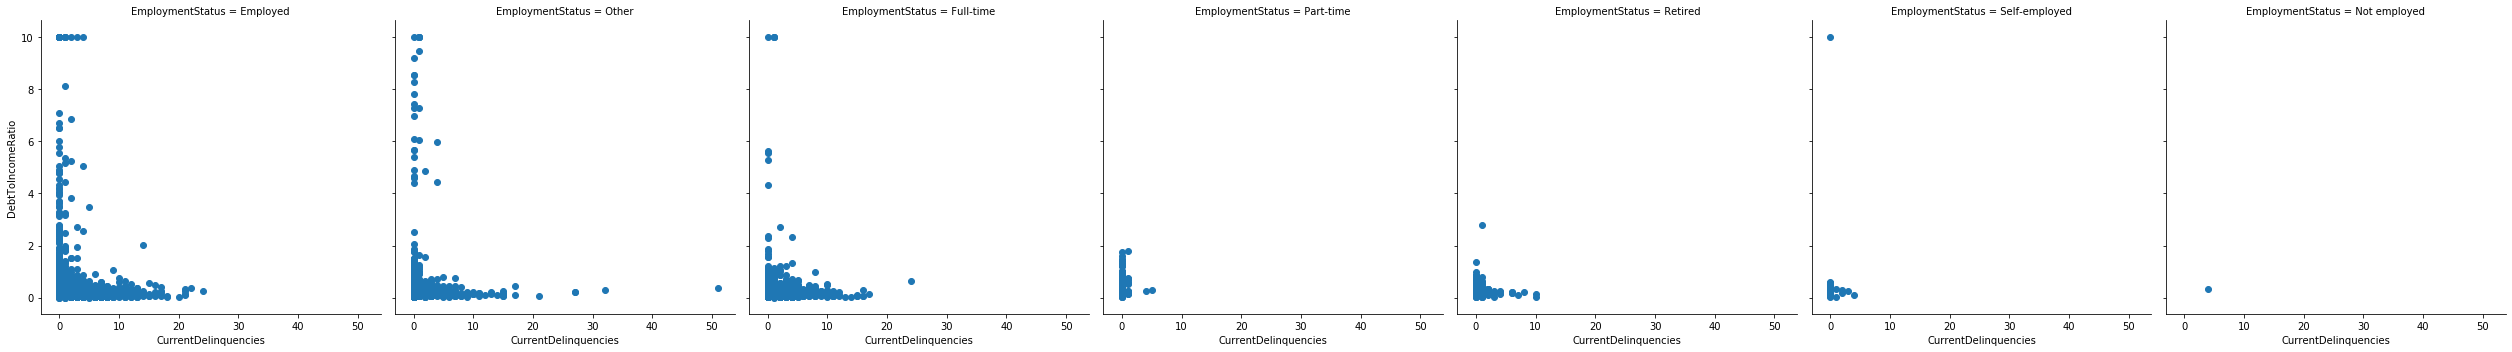

In [43]:
#Debt To Income Ratio among Delinquencies based on Employment Status
g = sns.FacetGrid(data = data, col='EmploymentStatus', size = 5,
                margin_titles = True)
g.map(plt.scatter, 'CurrentDelinquencies', 'DebtToIncomeRatio');

Clubs get the most of there profit from the customer on how to have a high risk. Which means low credit score, high debt to income ratio, Employed customer. Because these customers have a habit of taking debt or in a debt loop who takes one loan to the pay the other loans and these types of customers can give the club high Borrowing Rate or APR and can leave a part of principle as processing fee.

In [14]:
data.LoanOriginationDate = pd.to_datetime(data.LoanOriginationDate)
data.ClosedDate= pd.to_datetime(data.ClosedDate)

In [15]:
data['loan_duartaion'] = data.ClosedDate - data.LoanOriginationDate

In [16]:
data.loc[data.ClosedDate.isna(), 'loan_duartaion'] = data.LoanOriginationDate.max() - data.loc[data.ClosedDate.isna(), 'LoanOriginationDate']

In [17]:
data['loan_duartaion'] = data['loan_duartaion'].apply(lambda x : int(x.days))

In [18]:
closed_loan = data[data.ClosedDate.notnull()]

In [19]:
closed_loan.loc[closed_loan.loan_duartaion//30.417 < closed_loan.Term, 'status'] = 'early'
closed_loan.loc[closed_loan.loan_duartaion//30.417 == closed_loan.Term, 'status'] = 'time'
closed_loan.loc[closed_loan.loan_duartaion//30.417 > closed_loan.Term, 'status'] = 'late'

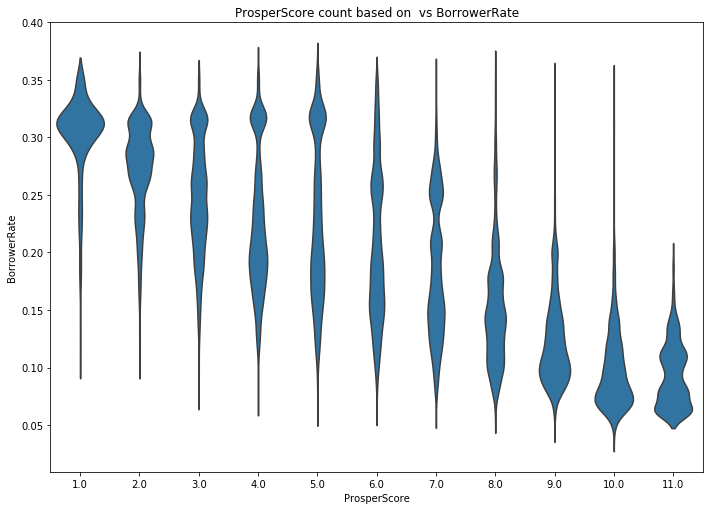

In [42]:
#BorrowerRate distibution based on prosperScore
plt.figure(figsize=[ 11.69, 8.27])
sns.violinplot(data=data, x="ProsperScore", y='BorrowerRate', inner = None, color = base_color);
plt.title("ProsperScore count based on  vs BorrowerRate");

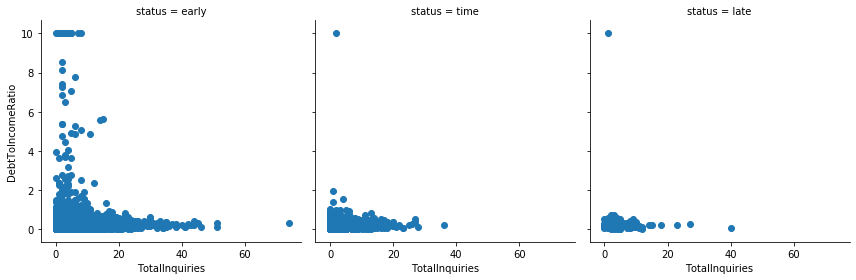

In [23]:
#Debt to income ratio among Inquiries based on status
g = sns.FacetGrid(data = closed_loan, col='status', size = 4,
                margin_titles = True)
g.map(plt.scatter, 'TotalInquiries', 'DebtToIncomeRatio');

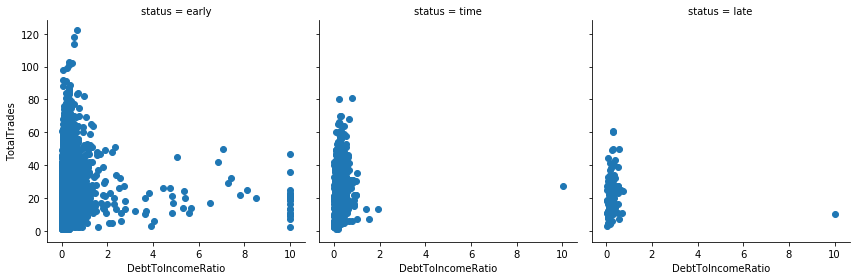

In [24]:
#Trades scatter among Debt To income ratio based on status
g = sns.FacetGrid(data = closed_loan, col='status', size = 4,
                margin_titles = True)
g.map(plt.scatter, 'DebtToIncomeRatio', 'TotalTrades');

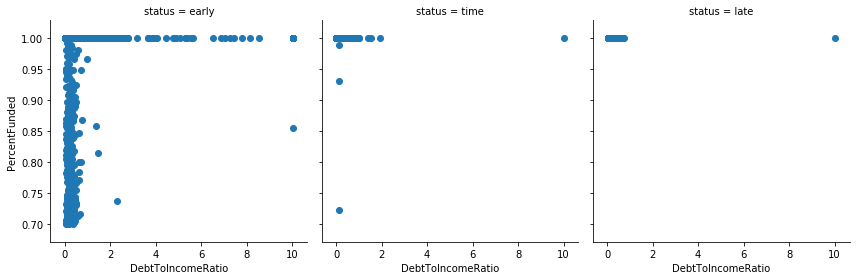

In [25]:
#Percentage Funded based on Debt To Income ratio among Status
g = sns.FacetGrid(data = closed_loan, col='status', size = 4,
                margin_titles = True)
g.map(plt.scatter, 'DebtToIncomeRatio', 'PercentFunded');

# Conclusion
With our analysis or findings, we can say that club is investing is targeting peoples who are outside the group and have a low credit score, have a medium risk with some kind of debt loop request of the debt for 35 moths term plan. Those customer is taking debt with a higher borrowing rate and procession fee. The customer has a high debt to income ratio and hight Trading history is those peoples who will pay the loan earlier and will have low bad debt.